In [17]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [18]:
n_task_per_file = 50
n_files = 10
base_dir = "toy_eg_"
files_list = []
for i in range(n_files):
    dir = base_dir + str(i*n_task_per_file) + "_"  + str((i+1)*n_task_per_file) + ".pkl"
    files_list.append(dir)

In [19]:
coverage_df = pd.DataFrame()
length_df = pd.DataFrame()
MSE_df = pd.DataFrame()

for f_dir in files_list:
    coverage_i, length_i, MSE_i = joblib.load(f_dir)
    coverage_df = pd.concat([coverage_df, pd.DataFrame(coverage_i)])
    length_df = pd.concat([length_df, pd.DataFrame(length_i)])
    MSE_df = pd.concat([MSE_df, pd.DataFrame(MSE_i)])

In [20]:
coverage_df

,0.1,0.2,0.3,0.4,Tree val,Naive
0,1.000000,1.000000,1.000000,0.714286,1.000000,0.000000
1,1.000000,0.833333,0.833333,0.833333,1.000000,0.400000
2,0.714286,0.857143,1.000000,1.000000,1.000000,0.400000
0,0.857143,0.875000,0.875000,0.750000,0.500000,0.000000
1,0.875000,1.000000,1.000000,0.875000,0.833333,0.000000
2,1.000000,1.000000,1.000000,0.875000,1.000000,0.166667
0,0.857143,0.857143,1.000000,0.857143,1.000000,0.200000
1,1.000000,1.000000,0.857143,0.857143,1.000000,0.200000
2,1.000000,1.000000,1.000000,1.000000,1.000000,0.200000
0,1.000000,1.000000,1.000000,1.000000,1.000000,0.200000


In [21]:
length_df

,0.1,0.2,0.3,0.4,Tree val,Naive
0,49.152055,13.819906,30.138437,23.809196,79.623106,2.384476
1,31.674702,17.200649,11.777221,9.015725,50.268921,1.978348
2,24.287792,17.778357,17.044110,16.996235,20.399156,1.956897
0,49.383008,45.177665,17.683939,14.015376,106.093822,2.502301
1,116.957953,65.342296,28.745252,21.187844,45.254469,2.328170
2,97.149343,45.988712,23.036215,17.839840,69.101521,2.034844
0,33.696135,32.962984,19.480538,17.468994,40.807210,2.276750
1,85.734643,28.367864,41.316426,11.474172,17.517176,2.251319
2,46.790849,34.002721,22.393631,17.785053,15.299284,1.985017
0,182.764976,25.770068,24.685012,18.202632,12.565572,1.851492


In [22]:
MSE_df

,0.1,0.2,0.3,0.4,Tree val,Naive
0,28.124251,25.739005,28.124251,27.388046,27.792989,27.792989
1,27.229082,27.567485,27.356191,26.308923,24.839841,24.839841
2,28.232183,28.888178,28.895870,28.020776,27.419976,27.419976
0,29.008855,29.680261,29.884859,29.050837,28.710774,28.710774
1,31.723184,32.238881,32.409376,33.431258,32.126412,32.126412
2,30.404132,31.040481,31.055883,31.002702,28.490289,28.490289
0,26.464486,27.396945,27.570314,27.355078,27.333391,27.333391
1,31.176288,33.574876,31.047432,30.389694,29.952416,29.952416
2,34.846542,34.623157,34.579773,34.854381,34.549021,34.549021
0,33.562060,32.811654,33.056313,32.863702,32.711134,32.711134


In [23]:
def boxplots(dfs, metrics):
    # Set up the subplots: one for each metric
    fig, axes = plt.subplots(1, 3, figsize=(15, 6))
    
    # Iterate over the dataframes and create a boxplot for each
    for i, (df, metric) in enumerate(zip(dfs, metrics)):
        sns.boxplot(data=df, ax=axes[i])
        axes[i].set_title(f'Boxplot for {metric}')
        axes[i].set_xlabel('Method')
        axes[i].set_ylabel('Value')
        # Add triangles for the mean values
        means = df.mean()  # Calculate mean for each method (column)
        print(metric,":\n",means.T)
        for j, mean in enumerate(means):
            axes[i].plot(j, mean, marker='^', color='red', markersize=10)  # Add a red triangle for the mean
        if metric == "Coverage":
            axes[i].set_ylim(0,1)
        elif metric == "Length":
            axes[i].set_ylim(0,300)
        elif metric == "MSE":
            axes[i].set_ylim(0,50)
    
    # Show the plots
    plt.tight_layout()
    plt.show()

Coverage :
 0.1         0.935961
0.2         0.938629
0.3         0.900862
0.4         0.914614
Tree val    0.907061
Naive       0.202833
dtype: float64
Length :
 0.1          66.803942
0.2          31.880148
0.3          23.250431
0.4          19.563428
Tree val    475.089906
Naive         2.243781
dtype: float64
MSE :
 0.1         30.686329
0.2         30.422237
0.3         30.530348
0.4         30.128436
Tree val    29.614022
Naive       29.614022
dtype: float64


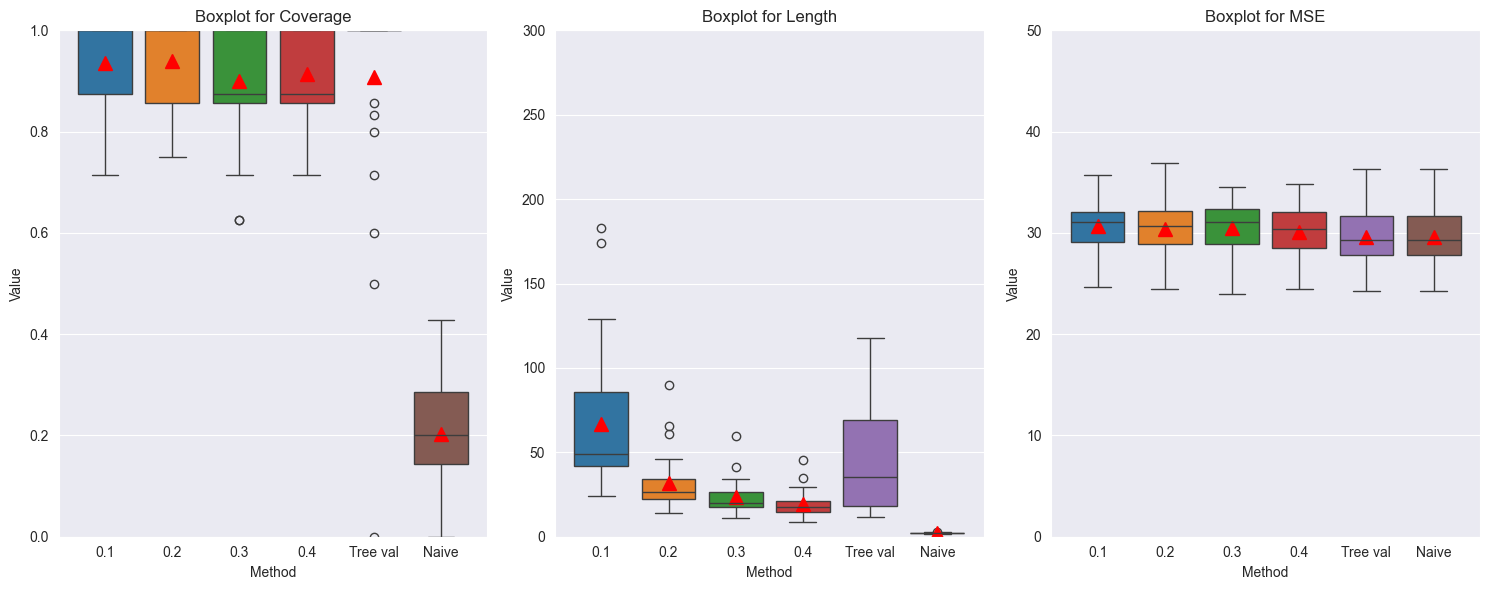

In [24]:
boxplots(dfs=[coverage_df, length_df, MSE_df], metrics=["Coverage", "Length", "MSE"])